In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
file_path = '/content/drive/MyDrive/Unified Mentor/CloudWatch_Traffic_Web_Attack.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

In [5]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [7]:
data.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [8]:
import pandas as pd

# Remove duplicate rows
df_unique = data.drop_duplicates()

# Convert time-related columns to datetime format (if columns exist)
for col in ['creation_time', 'end_time', 'time']:
    if col in df_unique.columns:
        df_unique[col] = pd.to_datetime(df_unique[col])

# Standardize text data (convert country codes to uppercase)
if 'src_ip_country_code' in df_unique.columns:
    df_unique['src_ip_country_code'] = df_unique['src_ip_country_code'].str.upper()

# Display changes and current state of the DataFrame
print("Unique Datasets Information:")
df_unique.info()

Unique Datasets Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object            

In [9]:
print("Top 5 Unique Datasets Information:")
df_unique.head()

Top 5 Unique Datasets Information:


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


In [10]:
# Feature engineering: Calculate duration of connection
df_unique['duration_seconds'] = (df_unique['end_time'] -
df_unique['creation_time']).dt.total_seconds()

# Preparing column transformations

# StandardScaler for numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[['bytes_in', 'bytes_out', 'duration_seconds']])

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Ensure the column exists before applying OneHotEncoder
if 'src_ip_country_code' in df_unique.columns:
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False instead of sparse=False
    encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])

    # Get feature names
    encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])

    # Convert encoded features to DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df_unique.index)

    # Concatenate with the original DataFrame
    df_unique = pd.concat([df_unique, encoded_df], axis=1)

# Display updated DataFrame info
print("Updated DataFrame Information:")
df_unique.info()

Updated DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   bytes_in                282 non-null    int64              
 1   bytes_out               282 non-null    int64              
 2   creation_time           282 non-null    datetime64[ns, UTC]
 3   end_time                282 non-null    datetime64[ns, UTC]
 4   src_ip                  282 non-null    object             
 5   src_ip_country_code     282 non-null    object             
 6   protocol                282 non-null    object             
 7   response.code           282 non-null    int64              
 8   dst_port                282 non-null    int64              
 9   dst_ip                  282 non-null    object             
 10  rule_names              282 non-null    object             
 11  observation_na

In [14]:
import pandas as pd

# Ensure scaled features exist before converting to DataFrame
if 'scaled_features' in locals() and 'scaled_columns' in locals():
    scaled_df = pd.DataFrame(scaled_features, columns=scaled_columns, index=df_unique.index)
else:
    scaled_df = pd.DataFrame()

# Ensure encoded features exist before converting to DataFrame
if 'encoded_features' in locals() and 'encoded_columns' in locals():
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df_unique.index)
else:
    encoded_df = pd.DataFrame()

# Concatenate only non-empty DataFrames
dataframes_to_concat = [df_unique, scaled_df, encoded_df]
transformed_df = pd.concat([df for df in dataframes_to_concat if not df.empty], axis=1)

# Display transformed data
print("Transformed DataFrame:")
print(transformed_df.head())

Transformed DataFrame:
   bytes_in  bytes_out             creation_time                  end_time  \
0      5602      12990 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
1     30912      18186 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
2     28506      13468 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
3     30546      14278 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
4      6526      13892 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip  ...  src_ip_country_code_IL  src_i

In [15]:
# Compute correlation matrix for numeric columns only
numeric_df = transformed_df.select_dtypes(include=['float64',
'int64'])
correlation_matrix_numeric = numeric_df.corr()
# Display the correlation matrix
correlation_matrix_numeric

,bytes_in,bytes_out,response.code,dst_port,duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
bytes_in,1.000000,0.997705,NaN,NaN,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
bytes_out,0.997705,1.000000,NaN,NaN,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
response.code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_ip_country_code_AE,-0.070559,-0.072452,NaN,NaN,NaN,1.000000,-0.069568,-0.143607,-0.081429,-0.056055,-0.064040,-0.200546,1.000000,-0.069568,-0.143607,-0.081429,-0.056055,-0.064040,-0.200546
src_ip_country_code_AT,-0.081670,-0.081777,NaN,NaN,NaN,-0.069568,1.000000,-0.166091,-0.094178,-0.064831,-0.074067,-0.231945,-0.069568,1.000000,-0.166091,-0.094178,-0.064831,-0.074067,-0.231945
src_ip_country_code_CA,-0.166488,-0.159587,NaN,NaN,NaN,-0.143607,-0.166091,1.000000,-0.194410,-0.133830,-0.152894,-0.478798,-0.143607,-0.166091,1.000000,-0.194410,-0.133830,-0.152894,-0.478798
src_ip_country_code_DE,-0.095333,-0.090001,NaN,NaN,NaN,-0.081429,-0.094178,-0.194410,1.000000,-0.075885,-0.086695,-0.271493,-0.081429,-0.094178,-0.194410,1.000000,-0.075885,-0.086695,-0.271493
src_ip_country_code_IL,-0.065939,-0.067630,NaN,NaN,NaN,-0.056055,-0.064831,-0.133830,-0.075885,1.000000,-0.059680,-0.186893,-0.056055,-0.064831,-0.133830,-0.075885,1.000000,-0.059680,-0.186893


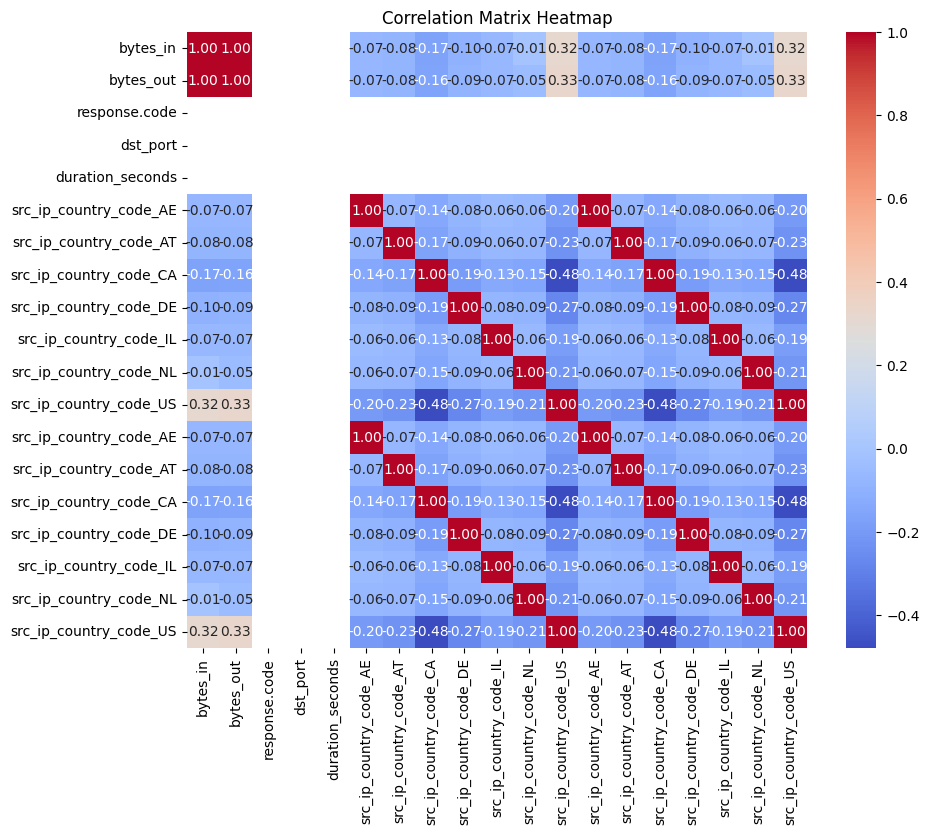

In [16]:
# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

plt.show()

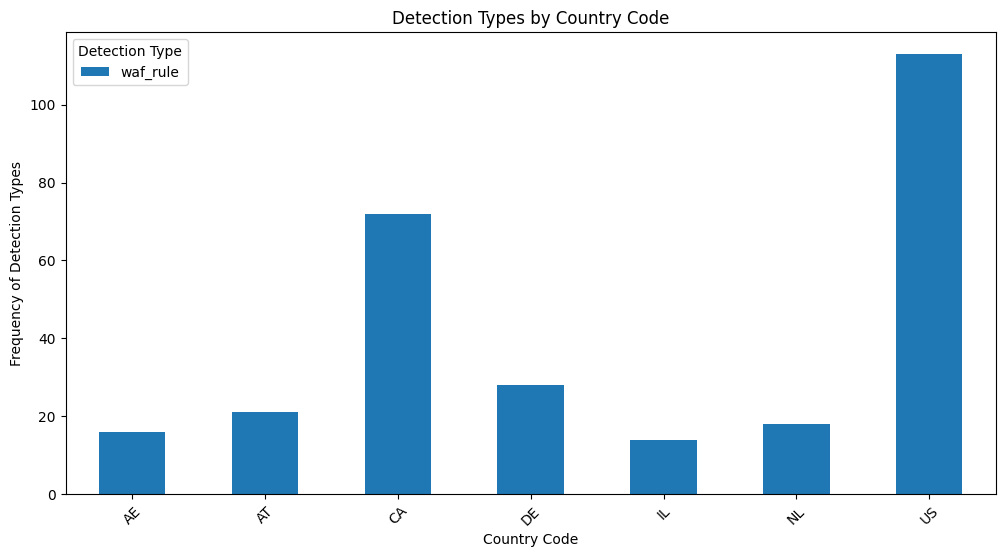

In [18]:
# Stacked Bar Chart for Detection Types by Country
# Preparing data for stacked bar chart
detection_types_by_country = pd.crosstab(transformed_df['src_ip_country_code'], transformed_df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

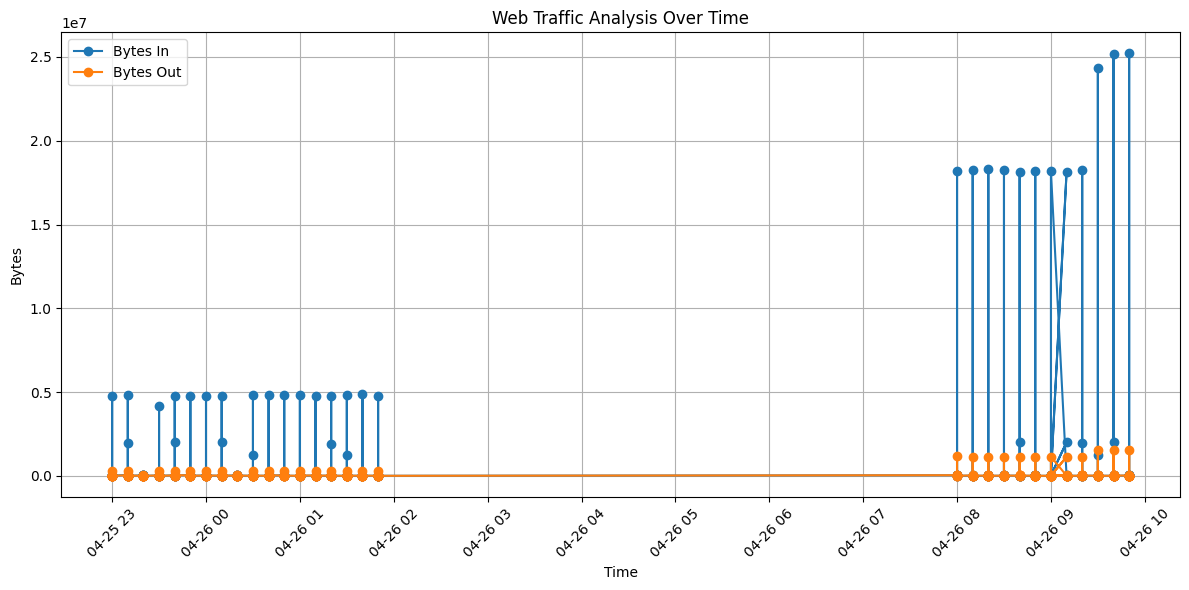

In [19]:
# Convert 'creation_time' to datetime format
data['creation_time'] = pd.to_datetime(data['creation_time'])

# Set 'creation_time' as the index
data.set_index('creation_time', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['bytes_in'], label='Bytes In',
marker='o')
plt.plot(data.index, data['bytes_out'], label='Bytes Out',
marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

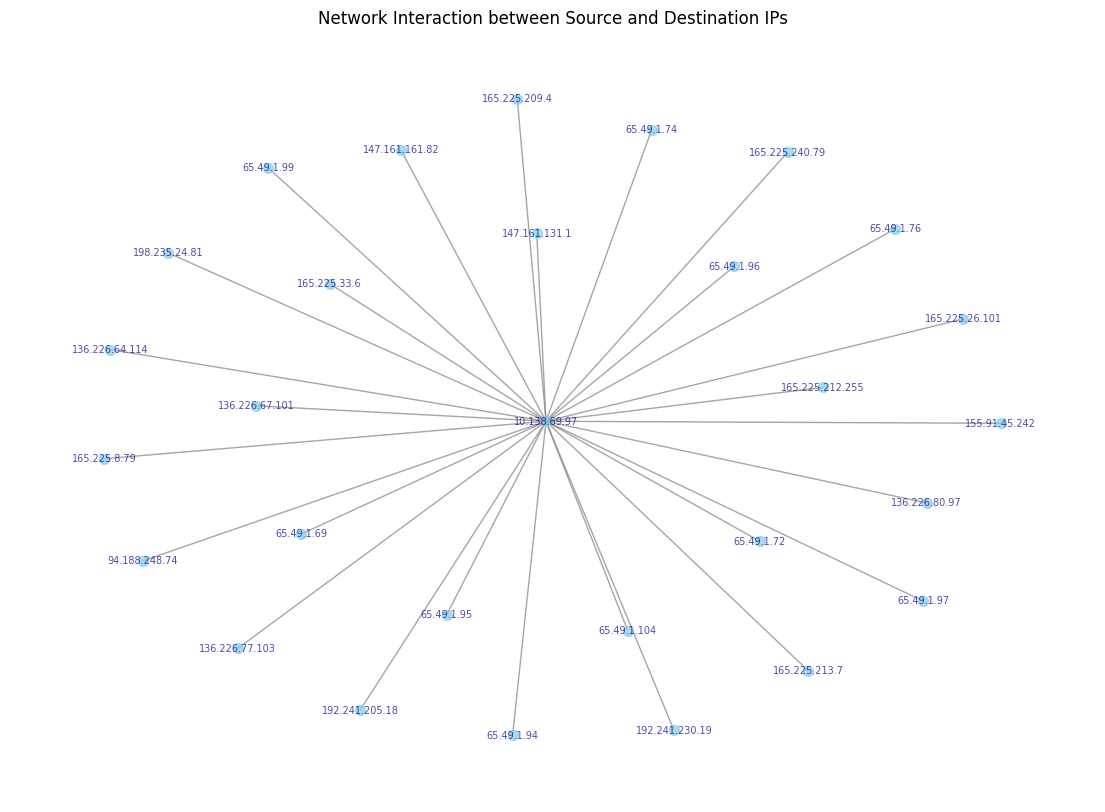

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Ensure required columns exist before proceeding
if 'src_ip' in data.columns and 'dst_ip' in data.columns:
    # Add edges from source IP to destination IP
    for idx, row in data.iterrows():
        G.add_edge(row['src_ip'], row['dst_ip'])

    # Draw the network graph
    plt.figure(figsize=(14, 10))

    # Use a layout for better node positioning
    pos = nx.spring_layout(G, k=0.5)  # k controls the distance between nodes

    # Draw the graph with labels and styling
    nx.draw_networkx(G, pos, with_labels=True,
                     node_size=50, font_size=7,
                     node_color='skyblue', font_color='darkblue',
                     edge_color='gray', alpha=0.7)

    plt.title('Network Interaction between Source and Destination IPs')
    plt.axis('off')  # Turn off the axis

    # Show the plot
    plt.show()
else:
    print("Error: Columns 'src_ip' and 'dst_ip' are missing from the dataset.")

In [23]:
# Ensure 'detection_types' exists before encoding
if 'detection_types' in transformed_df.columns:
    transformed_df['is_suspicious'] = (transformed_df['detection_types'] == 'waf_rule').astype(int)
else:
    print("Error: Column 'detection_types' is missing from the dataset.")

# Define features and labels
feature_cols = ['bytes_in', 'bytes_out', 'scaled_duration_seconds']

# Ensure all feature columns exist before proceeding
missing_features = [col for col in feature_cols if col not in transformed_df.columns]
if missing_features:
    print(f"Error: Missing feature columns: {missing_features}")
else:
    X = transformed_df[feature_cols]  # Feature matrix
    y = transformed_df['is_suspicious']  # Binary labels

    print("Feature matrix (X) and labels (y) successfully created.")

Error: Missing feature columns: ['scaled_duration_seconds']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Ensure X and y exist before proceeding
if 'X' in locals() and 'y' in locals() and not X.empty:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_classifier.predict(X_test)

In [27]:
# Ensure 'detection_types' exists before encoding
if 'detection_types' in transformed_df.columns:
    transformed_df['is_suspicious'] = (transformed_df['detection_types'] == 'waf_rule').astype(int)
else:
    print("Error: Column 'detection_types' is missing from the dataset.")

# Define features and labels
feature_cols = ['bytes_in', 'bytes_out', 'duration_seconds']  # Changed: Use 'duration_seconds' instead of 'scaled_duration_seconds'

# Ensure all feature columns exist before proceeding
missing_features = [col for col in feature_cols if col not in transformed_df.columns]
if missing_features:
    print(f"Error: Missing feature columns: {missing_features}")
else:
    X = transformed_df[feature_cols]  # Feature matrix
    y = transformed_df['is_suspicious']  # Binary labels

    print("Feature matrix (X) and labels (y) successfully created.")

# ... (rest of your code) ...

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report # Added import for accuracy_score and classification_report


# Ensure X and y exist before proceeding
if 'X' in locals() and 'y' in locals() and not X.empty:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification}")
else:
    print("Error: Feature matrix (X) or labels (y) not defined or empty.")

Feature matrix (X) and labels (y) successfully created.
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [30]:
print("Model Accuracy: ",accuracy)

Model Accuracy:  1.0


In [31]:
print("Classification Report: ",classification)

Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [33]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure 'detection_types' exists before encoding
if 'detection_types' in data.columns:
    data['is_suspicious'] = (data['detection_types'] == 'waf_rule').astype(int)
else:
    print("Error: Column 'detection_types' is missing from the dataset.")

# Define features and labels
feature_cols = ['bytes_in', 'bytes_out']

# Ensure all feature columns exist before proceeding
missing_features = [col for col in feature_cols if col not in data.columns]
if missing_features:
    print(f"Error: Missing feature columns: {missing_features}")
else:
    X = data[feature_cols].values  # Using only numeric features
    y = data['is_suspicious'].values.astype(np.float32)  # Convert y to float32 for TensorFlow

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build Neural Network model
    model = Sequential([
        Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=8, verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9269 - loss: 0.6550
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5358 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4329 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3349 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2495 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1805
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1264
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0982
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0679
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0551
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0456 
Test Accuracy: 100.00%


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.8825 - loss: 0.6466 - val_accuracy: 1.0000 - val_loss: 0.5288
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 1.0000 - loss: 0.5366 - val_accuracy: 1.0000 - val_loss: 0.4309
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 0.4522 - val_accuracy: 1.0000 - val_loss: 0.3413
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.3429 - val_accuracy: 1.0000 - val_loss: 0.2562
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.2672 - val_accuracy: 1.0000 - val_loss: 0.1786
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.1939 - val_accuracy: 1.0000 - val_loss: 0.1159
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.1270 - val_accuracy: 1.0000 - val_loss: 0.0714
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0798 - val_accuracy: 1.0000 - val_loss: 0.0432

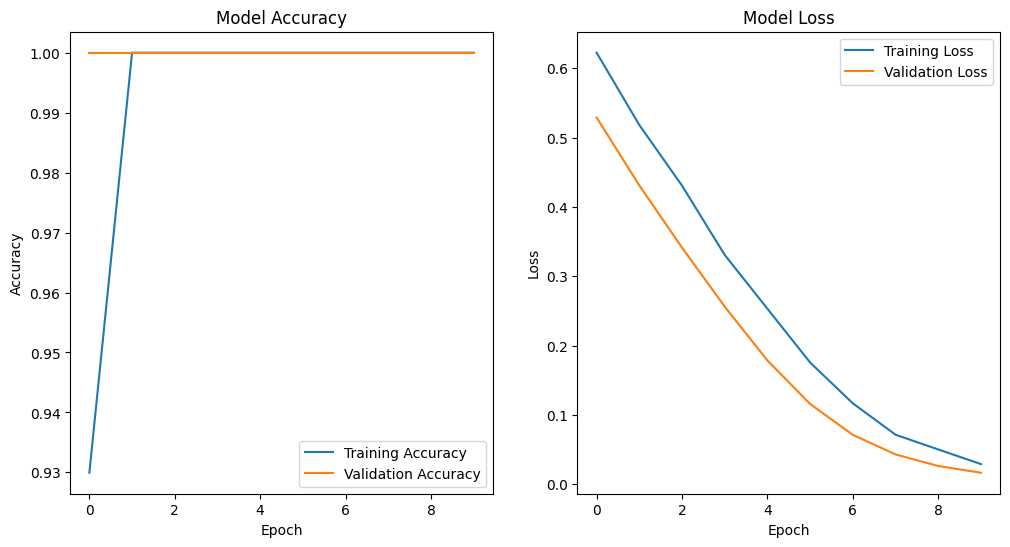

In [34]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define features and labels
feature_cols = ['bytes_in', 'bytes_out']

# Ensure all feature columns exist before proceeding
missing_features = [col for col in feature_cols if col not in data.columns]
if missing_features:
    print(f"Error: Missing feature columns: {missing_features}")
else:
    X = data[feature_cols].values  # Using only numeric features
    y = data['is_suspicious'].values.astype(np.float32)  # Convert y to float32 for TensorFlow

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build Neural Network model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    print(f"Test Accuracy: {accuracy*100:.2f}%")

    # Plot training history
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.4675 - loss: 0.6990 - val_accuracy: 1.0000 - val_loss: 0.6623
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8912 - loss: 0.6531 - val_accuracy: 1.0000 - val_loss: 0.6174
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9966 - loss: 0.6205 - val_accuracy: 1.0000 - val_loss: 0.5770
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.5828 - val_accuracy: 1.0000 - val_loss: 0.5386
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.5562 - val_accuracy: 1.0000 - val_loss: 0.5006
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 1.0000 - loss: 0.5143 - val_accuracy: 1.0000 - val_loss: 0.4606
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 0.4779 - val_accuracy: 1.0000 - val_loss: 0.4178
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.4290 - val_accuracy: 1.0000 - val_loss: 0.3735

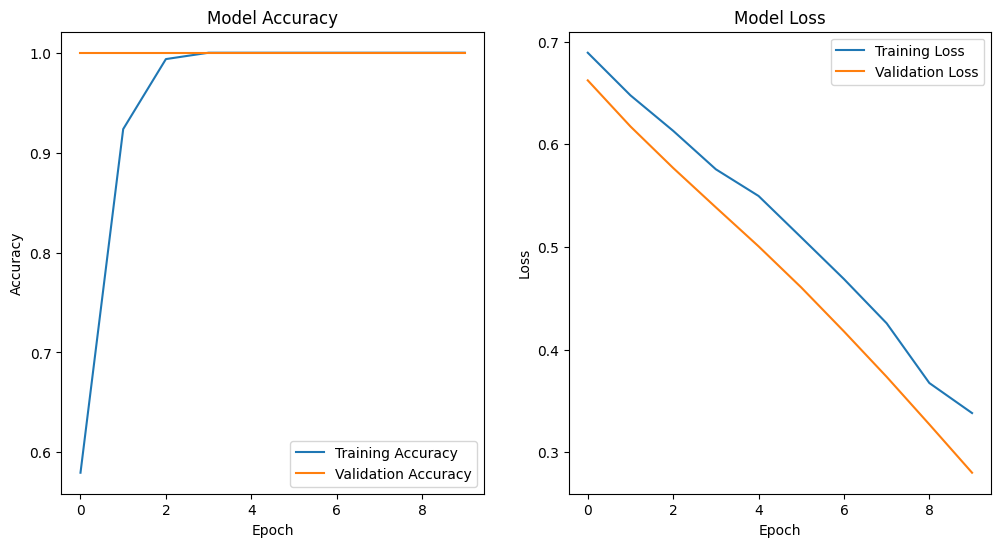

In [35]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define features and labels
feature_cols = ['bytes_in', 'bytes_out']

# Ensure all feature columns exist before proceeding
missing_features = [col for col in feature_cols if col not in data.columns]
if missing_features:
    print(f"Error: Missing feature columns: {missing_features}")
else:
    X = data[feature_cols].values
    y = data['is_suspicious'].values.astype(np.float32)  # Convert y to float32

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalize and reshape data for Conv1D
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
    X_test_scaled = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

    # Build Conv1D model
    model = Sequential([
        Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    print(f"Test Accuracy: {accuracy*100:.2f}%")

    # Plot training history
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()